# Tutorial 5 (Introduction to AI)

# Supervised Learning: further classifiers

# Part 1. k-nearest-neighbour classifier

The k-Nearest-Neighbours (kNN) method of classification is one of the simpler methods in AI and machine learning, and can be effective for the appropriate kind of problem. At its most basic level, it is essentially classification by finding the most similar data points in the training data, and making an educated guess based on their classifications. Although simple to understand and implement, this method has seen wide application in many domains, such as in recommendation systems, semantic searching, and anomaly detection.

As we need to in any AI and machine learning problem, we must first find a way to represent data points as feature vectors. A feature vector is our mathematical representation of data, and since the desired characteristics of our data may not be inherently numerical, preprocessing and feature-engineering may be required in order to create these vectors. Given data with N unique features, the feature vector would be a vector of length N, where entry *i* of the vector represents that data point’s value for feature i. Each feature vector can thus be thought of as a point in R^N.

Unlike most other methods of classification, kNN falls under lazy learning, which means that there is no explicit training phase before classification. Instead, any attempts to generalize or abstract the data is made upon classification. Whilst this does mean that we can immediately begin classifying once we have our data, there are some inherent problems with this type of algorithm.  We must be able to keep the entire training set in memory unless we apply some type of reduction to the data-set, and performing classifications can be computationally expensive as the algorithm works through all data points for each classification. For these reasons, kNN tends to work best on smaller datasets that do not have many features.

Once we have formed our training dataset, which is represented as an M x N matrix where M is the number of data points and N is the number of features, we can now begin classifying. The process of applying the kNN method is, for each classification query, to:

1. Compute a distance value between the item to be classified and every item in the training dataset

2. Pick the k closest data points (the items with the k lowest distances)

3. Conduct a “majority vote” among those data points — the dominating classification in that pool is decided as the final classification

There are two important decisions that must be made before making classifications. One is the **value of k** that will be used; this can either be decided arbitrarily, or you can try cross-validation to find an optimal value. The next, and the most complex, is the **distance metric** that will be used.

There are many different ways to compute distance, as it is a fairly ambiguous notion, and the proper metric to use is always going to be determined by the dataset and the classification task. Popular ones include Euclidean distance and Hamming distance.

https://machinelearningknowledge.ai/wp-content/uploads/2018/08/Value-of-K.gif

![Picture 1.png](attachment:14462949-8bc1-4ed7-8753-66fa3611d684.png)

### 1. Dataset

In this tutorial we will again use the "iris" dataset provided by the datasets of the **sklearn** module.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

We create a learnset from the sets above. We use permutation from np.random to split the data randomly.

In [ ]:

for k in iris:
    print(k)

data
target
frame
target_names
DESCR
feature_names
filename


In [ ]:
for k in (iris):
    if k != "data" and k!= "target":
        print ("key {} :  = {}".format(k,iris[k]) )

key frame :  = None
key target_names :  = ['setosa' 'versicolor' 'virginica']
key DESCR :  = .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                  columns=np.append(iris['feature_names'],['target']))

df = df.reindex(np.random.permutation(df.index))

result = []
for x in df.columns:
    if x != 'target':
        result.append(x)

#Define X and y
X = df[result].values
y = df['target'].values
variety = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=9)

Let's again visualize the data.  This time, we will reduce the data to three values by summing up the third and fourth value. This way, we are capable of depicting the data in 3-dimensional space:

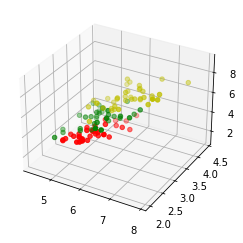

In [ ]:
# following line is only necessary, if you use ipython notebook!!!
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
newX = []
for iclass in range(3):       # There are 3 classes iin iris dataset
    newX.append([[], [], []])
    for i in range(len(X_train)):
        if y_train[i] == iclass:
            newX[iclass][0].append(X_train[i][0])
            newX[iclass][1].append(X_train[i][1])
            newX[iclass][2].append(sum(X_train[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(newX[iclass][0], newX[iclass][1], newX[iclass][2], c=colours[iclass])
plt.show()

In [ ]:
print(len(newX[0]))
print(len(newX[0][0]))

3


### 2. Determining the neighbors

To determine the similarity between two instances, we need a distance function. In our example, the Euclidean distance is ideal:

In [ ]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    return np.linalg.norm(instance1 - instance2)

print(distance([3, 5], [1, 1]))
print(distance(X[3], X[44]))

4.47213595499958
3.706750598570128


The function *'get_neighbors'* returns a list with 'k' neighbors, which are closest to the instance 'test_instance':

In [ ]:
def get_neighbours(training_set,
                  labels,
                  test_instance,
                  k,
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with
    (index, dist, label)
    where
    index    is the index from the training_set,
    dist     is the distance between the test_instance and the
             instance training_set[index]
    distance is a reference to a function used to calculate the
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbours = distances[:k]
    return neighbours

We will test the function with our iris samples:

In [ ]:
n_neighbours = 3

for i in range(5):
    neighbours = get_neighbours(X_train,
                              y_train,
                              X_test[i],
                              n_neighbours,
                              distance=distance)
    print(f"index {i}, \n x test : {X_test[i]}, \t y_test : {y_test[i]}\n")
    print("Value \t\t\t\t Distance \t\t label ")
    for n in neighbours:
        (print(f"value {n[0]} \t {n[1]} \t {n[2]}"))
    print ("----------------")

index 0, 
 x test : [5.5 2.3 4.  1.3], 	 y_test : 1.0

Value 				 Distance 		 label 
value [5.5 2.5 4.  1.3] 	 0.20000000000000018 	 1.0
value [5.5 2.4 3.8 1.1] 	 0.3000000000000001 	 1.0
value [5.6 2.5 3.9 1.1] 	 0.31622776601683794 	 1.0
----------------
index 1, 
 x test : [6.4 3.1 5.5 1.8], 	 y_test : 2.0

Value 				 Distance 		 label 
value [6.5 3.  5.5 1.8] 	 0.1414213562373093 	 2.0
value [6.5 3.  5.2 2. ] 	 0.3872983346207415 	 2.0
value [6.4 2.8 5.6 2.1] 	 0.4358898943540675 	 2.0
----------------
index 2, 
 x test : [6.  2.9 4.5 1.5], 	 y_test : 1.0

Value 				 Distance 		 label 
value [6.1 3.  4.6 1.4] 	 0.19999999999999973 	 1.0
value [6.1 2.9 4.7 1.4] 	 0.24494897427831785 	 1.0
value [5.9 3.  4.2 1.5] 	 0.33166247903553975 	 1.0
----------------
index 3, 
 x test : [6.  2.7 5.1 1.6], 	 y_test : 1.0

Value 				 Distance 		 label 
value [6.3 2.8 5.1 1.5] 	 0.33166247903553975 	 2.0
value [5.8 2.7 5.1 1.9] 	 0.3605551275463989 	 2.0
value [5.8 2.7 5.1 1.9] 	 0.36055512754639

###  3. Voting to obtain a single result

We will write a vote function now. This functions uses the class 'Counter' from collections to count the quantity of the classes inside of an instance list. This instance list will be the neighbors of course. The function 'vote' returns the most common class:

In [ ]:
from collections import Counter
def vote(neighbours):
    class_counter = Counter()
    for neighbour in neighbours:
        class_counter[neighbour[2]] += 1   # neighbour[2] is the label

    return class_counter.most_common(1)[0][0]   # get only one most common element

We will test 'vote' on our training samples:

In [ ]:
for i in range(len(X_test)):
    neighbours = get_neighbours(X_train,
                              y_train,
                              X_test[i],
                              3,
                              distance=distance)
    print("index: ", i,
          ", result of vote: ", vote(neighbours),
          ", label: ", y_test[i],
          ", data: ", X_test[i])

index:  0 , result of vote:  1.0 , label:  1.0 , data:  [5.5 2.3 4.  1.3]
index:  1 , result of vote:  2.0 , label:  2.0 , data:  [6.4 3.1 5.5 1.8]
index:  2 , result of vote:  1.0 , label:  1.0 , data:  [6.  2.9 4.5 1.5]
index:  3 , result of vote:  2.0 , label:  1.0 , data:  [6.  2.7 5.1 1.6]
index:  4 , result of vote:  1.0 , label:  1.0 , data:  [6.  2.2 4.  1. ]
index:  5 , result of vote:  0.0 , label:  0.0 , data:  [5.1 3.4 1.5 0.2]
index:  6 , result of vote:  2.0 , label:  2.0 , data:  [7.7 3.  6.1 2.3]
index:  7 , result of vote:  0.0 , label:  0.0 , data:  [5.  3.6 1.4 0.2]
index:  8 , result of vote:  1.0 , label:  1.0 , data:  [6.7 3.1 4.4 1.4]
index:  9 , result of vote:  0.0 , label:  0.0 , data:  [4.9 3.1 1.5 0.2]
index:  10 , result of vote:  1.0 , label:  1.0 , data:  [5.6 2.7 4.2 1.3]
index:  11 , result of vote:  2.0 , label:  2.0 , data:  [7.7 2.8 6.7 2. ]
index:  12 , result of vote:  0.0 , label:  0.0 , data:  [5.  3.4 1.5 0.2]
index:  13 , result of vote:  1.0 ,

We can see that the predictions mostly correspond to the labelled results, but with exceptions, such as in case of the item with the index 11.

'vote_prob' is a function like 'vote' but returns the class name and the probability for this class:

In [ ]:
def vote_prob(neighbours):
    class_counter = Counter()
    for neighbour in neighbours:
        class_counter[neighbour[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [ ]:
# just to understand Counter functionality
letters = Counter("mississippi")
letters.most_common()

[('i', 4), ('s', 4), ('p', 2), ('m', 1)]

In [ ]:
for i in range(len(X_test)):
    neighbours = get_neighbours(X_train,
                              y_train,
                              X_test[i],
                              5,
                              distance=distance)
    print("index: ", i,
          ", vote_prob (format: (winer label,probability)): ", vote_prob(neighbours),
          ", label: ", y_test[i],
          ", data: ", X_test[i])

index:  0 , vote_prob (format: (winer label,probability)):  (1.0, 1.0) , label:  1.0 , data:  [5.5 2.3 4.  1.3]
index:  1 , vote_prob (format: (winer label,probability)):  (2.0, 1.0) , label:  2.0 , data:  [6.4 3.1 5.5 1.8]
index:  2 , vote_prob (format: (winer label,probability)):  (1.0, 1.0) , label:  1.0 , data:  [6.  2.9 4.5 1.5]
index:  3 , vote_prob (format: (winer label,probability)):  (2.0, 1.0) , label:  1.0 , data:  [6.  2.7 5.1 1.6]
index:  4 , vote_prob (format: (winer label,probability)):  (1.0, 1.0) , label:  1.0 , data:  [6.  2.2 4.  1. ]
index:  5 , vote_prob (format: (winer label,probability)):  (0.0, 1.0) , label:  0.0 , data:  [5.1 3.4 1.5 0.2]
index:  6 , vote_prob (format: (winer label,probability)):  (2.0, 1.0) , label:  2.0 , data:  [7.7 3.  6.1 2.3]
index:  7 , vote_prob (format: (winer label,probability)):  (0.0, 1.0) , label:  0.0 , data:  [5.  3.6 1.4 0.2]
index:  8 , vote_prob (format: (winer label,probability)):  (1.0, 1.0) , label:  1.0 , data:  [6.7 3.1 4

### 4. The weighted nearest neighbour classifier

We looked only at k items in the vicinity of an unknown object *UO*, and had a majority vote. Using the majority vote was shown to be quite efficient in our previous example, but this didn't take into account the following reasoning: The farther a neighbour is, the more it "deviates" from the "real" result. Or, in other words, we can trust the closest neighbours more than the farther ones. Let's assume we have 11 neighbours of an unknown item UO. The closest five neighbours belong to a class A and all the other six, which are farther away belong to a class B. What class should be assigned to UO? The previous approach says B, because we have a 6 to 5 vote in favor of B. On the other hand the closest 5 are all A and this should count more.

To pursue this strategy, we can assign weights to the neighbours in the following way: The nearest neighbor of an instance gets a weight 1/1, the second closest gets a weight of 1/2 and then going on up to 1/k for the farthest away neighbor.

This means that we are using the harmonic series as weights:



 $\sum_i^k \frac{1}{i+1} = 1 + \frac{1}{2} + \frac{1}{3} + ... \frac{1}{k}$

We implement this in the following function:

In [ ]:
def vote_harmonic_weights(neighbours, all_results=True):
    class_counter = Counter()
    number_of_neighbours = len(neighbours)
    for index in range(number_of_neighbours):
        class_counter[neighbours[index][2]] += 1/(index+1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [ ]:
for i in range(len(X_test)):
    neighbours = get_neighbours(X_train,
                              y_train,
                              X_test[i],
                              6,
                              distance=distance)
    print("index: ", i,
          ", result of vote: ",
          vote_harmonic_weights(neighbours,
                                all_results=True))

index:  0 , result of vote:  (1.0, [(1.0, 1.0)])
index:  1 , result of vote:  (2.0, [(2.0, 1.0)])
index:  2 , result of vote:  (1.0, [(1.0, 1.0)])
index:  3 , result of vote:  (2.0, [(2.0, 1.0)])
index:  4 , result of vote:  (1.0, [(1.0, 1.0)])
index:  5 , result of vote:  (0.0, [(0.0, 1.0)])
index:  6 , result of vote:  (2.0, [(2.0, 1.0)])
index:  7 , result of vote:  (0.0, [(0.0, 1.0)])
index:  8 , result of vote:  (1.0, [(1.0, 1.0)])
index:  9 , result of vote:  (0.0, [(0.0, 1.0)])
index:  10 , result of vote:  (1.0, [(1.0, 1.0)])
index:  11 , result of vote:  (2.0, [(2.0, 1.0)])
index:  12 , result of vote:  (0.0, [(0.0, 1.0)])
index:  13 , result of vote:  (1.0, [(1.0, 0.8979591836734694), (2.0, 0.10204081632653063)])
index:  14 , result of vote:  (0.0, [(0.0, 1.0)])
index:  15 , result of vote:  (2.0, [(2.0, 1.0)])
index:  16 , result of vote:  (2.0, [(2.0, 1.0)])
index:  17 , result of vote:  (0.0, [(0.0, 1.0)])
index:  18 , result of vote:  (2.0, [(2.0, 1.0)])
index:  19 , resu

The previous approach took only the ranking of the neighbours according to their distance in account. We can improve the voting by using the actual distance. To this purpos we will write a new voting function:

In [ ]:
def vote_distance_weights(neighbours, all_results=True):
    class_counter = Counter()
    number_of_neighbours = len(neighbours)
    for index in range(number_of_neighbours):
        dist = neighbours[index][1]
        label = neighbours[index][2]
        class_counter[label] += 1 / (dist**2 + 1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [ ]:
for i in range(len(X_test)):
    neighbours = get_neighbors(X_train,
                              y_train,
                              X_test[i],
                              6,
                              distance=distance)
    print("index: ", i,
          ", result of vote: ", vote_distance_weights(neighbours,
                                                      all_results=True))

index:  0 , result of vote:  (0.0, [(0.0, 1.0)])
index:  1 , result of vote:  (1.0, [(1.0, 1.0)])
index:  2 , result of vote:  (0.0, [(0.0, 1.0)])
index:  3 , result of vote:  (2.0, [(2.0, 1.0)])
index:  4 , result of vote:  (0.0, [(0.0, 1.0)])
index:  5 , result of vote:  (0.0, [(0.0, 1.0)])
index:  6 , result of vote:  (1.0, [(1.0, 0.8373064150003466), (2.0, 0.16269358499965333)])
index:  7 , result of vote:  (2.0, [(2.0, 0.8324113915358416), (1.0, 0.16758860846415843)])
index:  8 , result of vote:  (1.0, [(1.0, 0.835523979977417), (2.0, 0.16447602002258294)])
index:  9 , result of vote:  (0.0, [(0.0, 1.0)])
index:  10 , result of vote:  (0.0, [(0.0, 1.0)])
index:  11 , result of vote:  (2.0, [(2.0, 0.5195618743926715), (1.0, 0.48043812560732857)])
index:  12 , result of vote:  (0.0, [(0.0, 1.0)])
index:  13 , result of vote:  (0.0, [(0.0, 1.0)])
index:  14 , result of vote:  (0.0, [(0.0, 1.0)])
index:  15 , result of vote:  (0.0, [(0.0, 1.0)])
index:  16 , result of vote:  (2.0, [(2

###  5. One more example for nearest neighbour classification

We want to test the previous functions with another very simple dataset:

In [ ]:
train_set = [(1, 2, 2),
             (-3, -2, 0),
             (1, 1, 3),
             (-3, -3, -1),
             (-3, -2, -0.5),
             (0, 0.3, 0.8),
             (-0.5, 0.6, 0.7),
             (0, 0, 0)
            ]
labels = ['apple',  'banana', 'apple',
          'banana', 'apple', "orange",
          'orange', 'orange']
k = 1
for test_instance in [(0, 0, 0), (2, 2, 2),
                      (-3, -1, 0), (0, 1, 0.9),
                      (1, 1.5, 1.8), (0.9, 0.8, 1.6)]:
    neighbours = get_neighbours(train_set,
                              labels,
                              test_instance,
                              2)
    print("vote distance weights: ", vote_distance_weights(neighbours))

vote distance weights:  ('orange', [('orange', 1.0)])
vote distance weights:  ('apple', [('apple', 1.0)])
vote distance weights:  ('banana', [('banana', 0.5294117647058824), ('apple', 0.47058823529411764)])
vote distance weights:  ('orange', [('orange', 1.0)])
vote distance weights:  ('apple', [('apple', 1.0)])
vote distance weights:  ('apple', [('apple', 0.5084745762711865), ('orange', 0.4915254237288135)])


# k-nearest-neighbo(u)r classifier with sklearn

**neighbors** is a package of the *sklearn*, which provides functionalities for nearest neighbo(u)r classifiers both for unsupervised and supervised learning.

The classes in sklearn.neighbors can handle both Numpy arrays and scipy.sparse matrices as input. For dense matrices, a large number of possible distance metrics are supported.

**KNeighborsClassifier**
is based on the k nearest neighbours of a sample, which has to be classified. The number 'k' is an integer value specified by the user. This is the most frequently used classifiers of both algorithms.

There is no general way to define an optimal value for 'k'. This value depends on the data. As a general rule we can say that increasing 'k' reduces the noise but on the other hand makes the boundaries less distinct.

The decision based on the nearest neighbours can be reached either uniform weights, the class assigned to a query sample is calculated by a simple majority vote of the k-nearest neighbours. This does not take into account that the neighbours closer to the sample should contribute more than the ones further away. The weighting can be controlled by the weights keyword:

- weights = 'uniform' assigns uniform weights to each neighbor. This is also the default value.

- weights = 'distance' assigns weights proportional to the inverse of the distance from the query sample.

It is also possible to supply a user-defined function to compute the distance.

**Some useful parameters**

**n_neighbors**
int, optional (default = 5)

Number of neighbors to use by default for meth:'kneighbors' queries.

**weights**

str or callable, optional (default = 'uniform')

weight function used in prediction.

Possible values:
- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.
- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

**p**

integer, optional (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

**metric**

string or callable, default 'minkowski'
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics.

###  Example with kNN

We will again use the k-nearest neighbour classifier 'KNeighborsClassifier' from 'sklearn.neighbors' on the Iris data set:

In [ ]:
# Create and fit a nearest-neighbor classifier
# Using the train/test split from the previous section
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#KNeighborsClassifier(algorithm='auto',
#                     metric='minkowski',
#                     n_neighbors=5,
#                     p=2,
#                     weights='uniform')

print("Predictions form the classifier:")
print(knn.predict(X_test))
print("Target values:")
print(y_test)

Predictions form the classifier:
[2. 1. 1. 2. 2. 0. 2. 1. 2. 2. 0. 1. 2. 1. 0. 1. 1. 1. 2. 0. 0. 1. 2. 1.
 1. 2. 1. 2. 1. 0. 0. 2. 0. 1. 2. 1. 0. 1.]
Target values:
[2. 1. 1. 2. 2. 0. 2. 1. 2. 1. 0. 1. 2. 1. 0. 1. 1. 1. 2. 0. 0. 1. 2. 1.
 1. 2. 1. 2. 1. 0. 0. 2. 0. 1. 2. 1. 0. 1.]


In [ ]:
print(X_test[19], y_test[9])
print(knn.predict([X_test[9]]))

[4.8 3.4 1.6 0.2] 1.0
[2.]


We can see that the sample with the index 9 is not recognized properly.